# Mod2 Project - Linear Regression Model

First Notebook - Data Cleaning

## Using statistics, salaries, and awards information in Major League Baseball from 2000-2019

Here we are interested in creating a model that can predict a player who has been in the league at least 3 years but less than 6 years. The arbitration process is based on both sides submitting an offer they believe is fair. The arbitration panel chooses the more reasonable offer. This model should be able to give a reasonable offer that can be tailored to fit the party running it. 

In [1]:
import pandas as pd

import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import helper as helper
sns.set(style="darkgrid")
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 80)

%matplotlib inline

## Data collection was done from SeanLahman.com using statistics accumulated until the end of the 2019 season.

I used the timeframe of 2000-2019. It was the most recent and allowed for a good portion of the information to be from the major shift in team strategy.

In [2]:
# these are all of the datasets I will be using to create one dataframe 

df_people = pd.read_csv('baseballdatabank-master/core/People.csv')
df_sal = pd.read_csv('baseballdatabank-master/core/Salaries.csv')
df_bat = pd.read_csv('baseballdatabank-master/core/Batting.csv')
df_field = pd.read_csv('baseballdatabank-master/core/Fielding.csv')
df_award = pd.read_csv('baseballdatabank-master/core/AwardsPlayers.csv')
df_allstar = pd.read_csv('baseballdatabank-master/core/AllstarFull.csv')
df_appear = pd.read_csv('baseballdatabank-master/core/Appearances.csv')
df_pitch = pd.read_csv('baseballdatabank-master/core/Pitching.csv')

In [3]:
df_appear.head()

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1871,TRO,NaN,abercda01,1,1.0,1,1.0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0
1,1871,RC1,NaN,addybo01,25,25.0,25,25.0,0,0,0,22,0,3,0,0,0,0,0.0,0.0,0.0
2,1871,CL1,NaN,allisar01,29,29.0,29,29.0,0,0,0,2,0,0,0,29,0,29,0.0,0.0,0.0
3,1871,WS3,NaN,allisdo01,27,27.0,27,27.0,0,27,0,0,0,0,0,0,0,0,0.0,0.0,0.0
4,1871,RC1,NaN,ansonca01,25,25.0,25,25.0,0,5,1,2,20,0,1,0,0,1,0.0,0.0,0.0


In [4]:
df_people.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [5]:
df_pitch.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,0,0,78,43,23,0,11,1,NaN,7.96,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,0,0,792,361,132,4,37,13,NaN,4.50,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,0,0,3,8,3,0,0,0,NaN,27.00,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,1,0,639,295,103,3,31,15,NaN,4.35,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,0,0,27,20,10,0,3,0,NaN,10.00,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [6]:
# will limit the need to change every bit of code for easier analysis

yr = 2000                # integer format for trimming dataframes based on 'yearID'
yr_str = '2000-04-01'     # string format for trimming dataframe based on 'debut'

## Looking at the dataframes available, we can see that the dimensions are very different.

The awards and all star dataframes will likely be turned into binary variables to indicate the presence of an award. 

In [7]:
# try to understand what info we are working with

# included are the info received from each df and the way it may be used

print(df_people.shape)   # the list with all players
print(df_sal.shape)      # salary for each player per year
print(df_bat.shape)      # batting statistics for each player per year
print(df_pitch.shape)    # pitching statistics for each player per year
print(df_field.shape)    # fielding statistics for each player
print(df_award.shape)    # award info, used as binary (will have 1 if player won any type of award, 0 if they didn't)
print(df_allstar.shape)  # all-star info, used as binary (will have 1 if player was an allstar, 0 if not)


(19937, 24)
(26428, 5)
(107429, 22)
(47628, 30)
(143046, 18)
(6236, 6)
(5375, 8)


## In order to make the dataframes more time efficient, limiting their scope and series was needed.

Entries that fell before out time frame and columns that held irrelevant data were removed. Each of the dataframes must be scaled back to the time frame needed

This is done mostly for information processing speed. Trim the 'people' dataframe so that it only includes players that debuted after 2000.

This main df will be the one that all other df's will be joined to

In [8]:
df_people = df_people[df_people.debut > yr_str] # only players that have debuted after the year cutoff are present
df_people.head().sort_values(by = 'debut')


,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
23,abernbr01,1977.0,9.0,23.0,USA,GA,Atlanta,NaN,NaN,NaN,NaN,NaN,NaN,Brent,Abernathy,Michael Brent,185.0,73.0,R,R,2001-06-25,2005-09-29,aberb001,abernbr01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
21,abercre01,1980.0,7.0,15.0,USA,GA,Columbus,NaN,NaN,NaN,NaN,NaN,NaN,Reggie,Abercrombie,Reginald Damascus,215.0,75.0,R,R,2006-04-04,2008-09-28,aberr001,abercre01
5,abadfe01,1985.0,12.0,17.0,D.R.,La Romana,La Romana,NaN,NaN,NaN,NaN,NaN,NaN,Fernando,Abad,Fernando Antonio,235.0,74.0,L,L,2010-07-28,2019-09-28,abadf001,abadfe01


In [9]:
df_people.shape

(4528, 24)

Checking dataframe to see if debut minimum has changed

In [10]:
df_people['debut'].min()

'2000-04-03'

Trim the complementary dataframes

In [11]:
df_sal = df_sal[df_sal.yearID >= yr]
df_bat = df_bat[df_bat.yearID >= yr]
df_pitch = df_pitch[df_pitch.yearID >= yr]
df_field = df_field[df_field.yearID >= yr]
df_award = df_award[df_award.yearID >= yr]
df_allstar = df_allstar[df_allstar.yearID >= yr]
df_appear = df_appear[df_appear.yearID >= yr]


In [12]:
# drop the columns I don't need. Which includes the death statistics

df_people.drop(['deathYear', 'deathMonth','deathDay','deathCountry','deathState','retroID', # drop columns I won't need
                'deathCity', 'nameGiven','bbrefID'], axis=1, inplace = True)

df_people.head()

# now the master dataframe is much more manageable 

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,nameFirst,nameLast,weight,height,bats,throws,debut,finalGame
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,David,Aardsma,215.0,75.0,R,R,2004-04-06,2015-08-23
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,Andy,Abad,184.0,73.0,L,L,2001-09-10,2006-04-13
5,abadfe01,1985.0,12.0,17.0,D.R.,La Romana,La Romana,Fernando,Abad,235.0,74.0,L,L,2010-07-28,2019-09-28
21,abercre01,1980.0,7.0,15.0,USA,GA,Columbus,Reggie,Abercrombie,215.0,75.0,R,R,2006-04-04,2008-09-28
23,abernbr01,1977.0,9.0,23.0,USA,GA,Atlanta,Brent,Abernathy,185.0,73.0,R,R,2001-06-25,2005-09-29


# I want to have the salary of any player that played more than three years. This will be our target variable. 

The fourth year salary would, ideally, be the pay term that was arbitrated. 

In [13]:
df_people.shape

(4528, 15)

In [14]:
# take a look at the salary df

df_sal.head()

# each entry is a year that a player was paid
# will need to be grouped in order tmake it easier to work with

,yearID,teamID,lgID,playerID,salary
12263,2000,ANA,AL,anderga01,3250000
12264,2000,ANA,AL,belchti01,4600000
12265,2000,ANA,AL,botteke01,4000000
12266,2000,ANA,AL,clemeed02,215000
12267,2000,ANA,AL,colanmi01,200000


In [15]:
# group by player, leads to a player having a list of years that they played and was paid in chrono order
# grab the fourth entry for our target variable

# we will use our fourth_year() function created in the beginning

df_sal_grouped = df_sal.groupby(['playerID','yearID']).agg({'salary':'sum'})
df_sal_grouped = df_sal_grouped.groupby('playerID').agg({'salary':helper.fourth_year}).reset_index()

df_sal_grouped

# output is a player and the salary of their fourth year if they played a fourth year
# if they haven't played a fourth year, return a 0

,playerID,salary
0,aardsda01,419000
1,abadan01,0
2,abadfe01,1087500
3,abbotje01,0
4,abbotku01,0
...,...,...
3354,zobribe01,438100
3355,zuletju01,0
3356,zumayjo01,735000
3357,zuninmi01,0


## Determining the amount of seasons a player was in the league will help with data cleaning. 

Arbitration takes place after the third year. So players need to complete at least three years. 

In [16]:
# using the groupby function twice over, we are able to count the number of seasons a player played
# the count is based on how many different years a player was paid

df_sal_grouped_seas = df_sal.groupby(['playerID'
                                     ])['yearID'
                                       ].unique().reset_index() # this groups the player and an array of their years
                                    # have to use unique in order to account for trades                            

# the below code counts that array and returns the length as the number of seasons

df_sal_grouped_seas['seasons'] = df_sal_grouped_seas['yearID'].apply(lambda x: len(x))
df_sal_grouped_seas.drop(['yearID'], axis=1, inplace = True)


print(df_sal_grouped_seas.shape)
df_sal_grouped_seas.head()

# the output is a playerID and the amount of seasons played

(3359, 2)


,playerID,seasons
0,aardsda01,7
1,abadan01,1
2,abadfe01,5
3,abbotje01,2
4,abbotku01,2


In [17]:
# merge the salary with the number of seasons

df_sal_grouped = pd.merge(df_sal_grouped, df_sal_grouped_seas, on='playerID', how = 'left')
print(df_sal_grouped.shape)
df_sal_grouped.head()

# output is the playerID, fourth year salary, and how many seasons they will play in their career

(3359, 3)


,playerID,salary,seasons
0,aardsda01,419000,7
1,abadan01,0,1
2,abadfe01,1087500,5
3,abbotje01,0,2
4,abbotku01,0,2


## Importing and feature engineering batting & pitching parameters.

Discrete variables have to be engineered - including any percentage. This can be done based on the available features. 

In [18]:
# getting a feel for the batting stats df

df_bat.describe()

# the earliest year is the limitation set in the beginning

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000
mean,2009.748997,1.090154,49.376948,118.024003,15.779604,30.633775,6.117921,0.631928,3.695594,15.031282,1.960196,0.779427,11.121898,24.808401,0.824522,1.215993,1.007066,0.930725,2.660157
std,5.808928,0.303970,45.527897,179.331556,26.655075,49.820020,10.370286,1.537826,7.583878,26.204407,5.572375,1.897522,19.843270,36.978374,2.533903,2.653344,2.181388,1.840314,4.672562
min,2000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.000000,1.000000,33.000000,16.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2015.000000,1.000000,72.000000,173.000000,21.000000,42.000000,8.000000,0.000000,3.000000,19.000000,1.000000,1.000000,14.000000,36.000000,0.000000,1.000000,1.000000,1.000000,3.000000
max,2019.000000,5.000000,163.000000,716.000000,152.000000,262.000000,59.000000,23.000000,73.000000,160.000000,78.000000,24.000000,232.000000,223.000000,120.000000,30.000000,24.000000,16.000000,32.000000



The features below needed to be created separately due to limitations of hardware. They can be run in the same cell if the machine is capable.

In [19]:
#OBP - On base percentage -(H + BB + HBP) divided by at bats plus walks plus hit by pitch 
# plus sacrifice flies (AB + BB + HBP + SF).
df_bat['obp_num'] = (df_bat['H'] + df_bat['BB'] + df_bat['HBP'])


In [20]:
df_bat['obp_de'] = (df_bat['AB'] + df_bat['BB'] + df_bat['HBP'] + df_bat['SF'])


In [21]:
df_bat['OBP'] = df_bat['obp_num']/df_bat['obp_de']


In [22]:
# BA - batting average - hits divided by at bats
df_bat['BA'] = df_bat['H'] / df_bat['AB']


In [23]:
# TB - total bases - one for each single, two for each double, three for each triple, and four for each home run
df_bat['TB'] = df_bat['H'] + 2*df_bat['2B'] + 3*df_bat['3B'] + 4 * df_bat['HR']

In [24]:
# slugging average is TB divided by AB
df_bat['SLG'] = df_bat['TB'] / df_bat['AB']


In [25]:
# OPS on base percentage plus slugging
df_bat['OPS'] = df_bat['OBP'] + df_bat['SLG']

In [26]:
# aggregate the stats for the first three years for each player

df_bat_grouped = df_bat.groupby(['playerID','yearID']).agg({'G':'sum', 'AB':'sum', 'R':'sum', 'H':'sum',
       '2B':'sum', '3B':'sum', 'HR':'sum', 'RBI':'sum', 'SB':'sum', 'CS':'sum', 'BB':'sum', 'SO':'sum', 'IBB':'sum', 
        'HBP':'sum', 'SH':'sum','SF':'sum', 'GIDP':'sum', 'obp_num':'sum', 'obp_de':'sum', 'OBP':'sum', 
        'BA':'sum', 'TB':'sum', 'SLG':'sum', 'OPS':'sum'}).reset_index()
df_bat_grouped = df_bat_grouped.groupby('playerID').agg({'G':helper.rook_mean, 'AB':helper.rook_mean, 'R':helper.rook_mean, 'H':helper.rook_mean,
       '2B':helper.rook_mean, '3B':helper.rook_mean, 'HR':helper.rook_mean, 'RBI':helper.rook_mean, 'SB':helper.rook_mean, 'CS':helper.rook_mean, 'BB':helper.rook_mean,
        'SO':helper.rook_mean, 'IBB':helper.rook_mean,'HBP':helper.rook_mean, 'SH':helper.rook_mean,'SF':helper.rook_mean, 'GIDP':helper.rook_mean,
        'OBP':helper.rook_mean,'BA':helper.rook_mean, 'TB':helper.rook_mean, 'SLG':helper.rook_mean, 'OPS':helper.rook_mean}).reset_index()

print(df_bat_grouped.shape)
df_bat_grouped.head()


(5625, 23)


,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,TB,SLG,OPS
0,aardsda01,27.000000,0.666667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,abadan01,5.000000,7.000000,0.333333,0.666667,0.0,0.0,0.0,0.0,0.0,0.333333,1.333333,1.666667,0.0,0.0,0.000000,0.0,0.333333,0.203509,0.039216,0.666667,0.039216,0.242724
2,abadfe01,29.333333,2.666667,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.333333,0.0,0.0,0.000000,0.0,0.333333,0.047619,0.047619,0.333333,0.047619,0.095238
3,abbotje01,54.000000,128.500000,18.000000,35.000000,9.0,0.5,1.5,17.0,1.0,0.500000,12.000000,22.500000,0.5,1.5,1.000000,0.5,1.500000,0.334592,0.268162,60.500000,0.444241,0.778833
4,abbotku01,42.500000,83.000000,11.000000,18.000000,3.5,0.5,3.0,6.0,1.0,0.500000,7.000000,27.000000,1.0,0.5,0.000000,0.5,1.000000,0.252730,0.219391,38.500000,0.349965,0.602694


In [27]:
# getting a feel for the pitching stats df

df_pitch.describe()

# the earliest year is the limitation set in the beginning

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,14724.000000,14724.000000,14724.000000,14724.000000,14724.000000,14724.000000,14724.000000,14724.000000,14724.000000,14724.000000,14724.000000,14724.000000,14724.000000,14724.000000,14724.000000,14716.000000,14705.000000,14724.000000,14724.000000,14724.000000,14724.000000,14724.000000,14724.000000,14724.000000,14724.000000,14724.000000,14724.000000
mean,2010.041089,1.090329,3.299511,3.299511,25.901453,6.599837,0.188807,0.077696,1.663135,176.734719,58.594064,27.840804,7.068663,21.273159,47.451711,0.271303,5.493332,1.577085,2.198587,2.325863,0.206669,253.088427,6.411030,30.182084,1.926243,1.780223,5.088359
std,5.846610,0.302120,4.182932,3.651730,20.940461,10.654880,0.698973,0.344479,6.400494,176.995801,58.643615,27.121762,7.451205,19.753747,49.404910,0.081194,6.135741,1.939055,2.623326,2.783751,0.531179,248.437331,10.738848,29.365759,2.582891,2.058058,5.811151
min,2000.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,1.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,42.000000,15.000000,8.000000,2.000000,6.000000,10.000000,0.232000,3.330000,0.000000,0.000000,0.000000,0.000000,63.000000,0.000000,9.000000,0.000000,0.000000,1.000000
50%,2010.000000,1.000000,2.000000,2.000000,21.000000,0.000000,0.000000,0.000000,0.000000,120.000000,39.000000,19.000000,4.000000,15.000000,31.000000,0.264000,4.440000,1.000000,1.000000,1.000000,0.000000,175.000000,2.000000,20.000000,1.000000,1.000000,3.000000
75%,2015.000000,1.000000,5.000000,5.000000,35.000000,10.000000,0.000000,0.000000,0.000000,228.000000,76.000000,37.000000,10.000000,30.000000,67.000000,0.299000,5.950000,2.000000,3.000000,3.000000,0.000000,324.000000,8.000000,40.000000,3.000000,3.000000,7.000000
max,2019.000000,5.000000,24.000000,21.000000,94.000000,36.000000,11.000000,6.000000,62.000000,798.000000,271.000000,145.000000,48.000000,125.000000,372.000000,1.000000,189.000000,17.000000,25.000000,21.000000,6.000000,1071.000000,79.000000,152.000000,21.000000,14.000000,40.000000


In [28]:
df_pitch.rename(columns={"W": "W_p","L": "L_p","G": "G_p","GS": "GS_p","SHO": "SHO_p","SV": "SV_p","H": "H_p"
                  ,"ER": "ER_p","HR": "HR_p","IBB": "IBB_p","SO": "SO_p","R": "R_p","GIDP": "GIDP_p","SH": "SH_p",
                  "SF": "SF_p","HBP": "HBP_p","BB": "BB_p"}, errors="raise", inplace = True)

## Feature Engineer for Pitching Statistics

In [30]:
df_pitch['WHIP'] = (df_pitch['BB_p'] + df_pitch['H_p']) / ( (df_pitch['IPouts'])/3)

df_pitch['IP'] = df_pitch['IPouts'] /3

df_pitch['ERA'] = (9 * df_pitch['ER_p']) / df_pitch['IP']

In [31]:
df_pitch.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W_p', 'L_p', 'G_p',
       'GS_p', 'CG', 'SHO_p', 'SV_p', 'IPouts', 'H_p', 'ER_p', 'HR_p', 'BB_p',
       'SO_p', 'BAOpp', 'ERA', 'IBB_p', 'WP', 'HBP_p', 'BK', 'BFP', 'GF',
       'R_p', 'SH_p', 'SF_p', 'GIDP_p', 'WHIP', 'IP'],
      dtype='object')

In [34]:
# aggregate the stats for the first three years for each player

df_pitch_grouped = df_pitch.groupby(['playerID','yearID']).agg({'W_p':'sum', 'L_p':'sum', 'G_p':'sum', 'GS_p':'sum',
       'CG':'sum', 'SHO_p':'sum', 'SV_p':'sum', 'IPouts':'sum', 'ER_p':'sum', 'HR_p':'sum', 'SO_p':'sum', 'BAOpp':'sum', 
        'HBP_p':'sum', 'SH_p':'sum','SF_p':'sum', 'GIDP_p':'sum', 'ERA':'sum', 'WP':'sum', 'BK':'sum',
        'BFP':'sum','GF':'sum','R_p':'sum','SH_p':'sum','WHIP':'sum','IP':'sum','IBB_p':'sum','BB_p':'sum'}).reset_index()
df_pitch_grouped = df_pitch_grouped.groupby('playerID').agg({'G_p':helper.rook_mean, 'W_p':helper.rook_mean, 'L_p':helper.rook_mean, 'GS_p':helper.rook_mean,
       'CG':helper.rook_mean, 'SHO_p':helper.rook_mean, 'SV_p':helper.rook_mean, 'IPouts':helper.rook_mean, 'ER_p':helper.rook_mean, 'HR_p':helper.rook_mean,
        'SO_p':helper.rook_mean, 'IBB_p':helper.rook_mean,'BAOpp':helper.rook_mean, 'ERA':helper.rook_mean,'WP':helper.rook_mean, 'HBP_p':helper.rook_mean,
        'BK':helper.rook_mean,'BFP':helper.rook_mean, 'GF':helper.rook_mean, 'R_p':helper.rook_mean, 'SH_p':helper.rook_mean,
        'SF_p':helper.rook_mean,'GIDP_p':helper.rook_mean,'WHIP':helper.rook_mean,'IP':helper.rook_mean,'BB_p':helper.rook_mean}).reset_index()

print(df_pitch_grouped.shape)
df_pitch_grouped.head()

(3308, 27)


,playerID,G_p,W_p,L_p,GS_p,CG,SHO_p,SV_p,IPouts,ER_p,HR_p,SO_p,IBB_p,BAOpp,ERA,WP,HBP_p,BK,BFP,GF,R_p,SH_p,SF_p,GIDP_p,WHIP,IP,BB_p
0,aardsda01,27.000000,2.000000,0.333333,0.000000,0.000000,0.0,0.0,96.000000,18.333333,4.666667,30.000000,1.000000,0.310333,5.742511,1.000000,1.333333,0.0,145.666667,7.0,19.0,1.000000,1.666667,1.333333,1.948782,32.000000,18.333333
1,abadfe01,29.333333,0.333333,3.666667,2.000000,0.000000,0.0,0.0,84.666667,16.000000,4.666667,21.666667,0.333333,0.279000,5.083699,1.333333,1.333333,0.0,127.666667,5.0,17.0,1.000000,1.333333,1.333333,1.511177,28.222222,11.000000
2,abbotpa01,23.333333,9.000000,4.666667,19.666667,0.333333,0.0,0.0,368.333333,65.333333,16.333333,80.000000,3.000000,0.277333,6.812341,5.333333,4.333333,0.0,537.666667,1.0,68.0,1.666667,3.333333,10.333333,1.688307,122.777778,62.333333
3,abreubr01,7.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,26.000000,1.000000,0.000000,13.000000,0.000000,0.138000,1.038462,0.000000,0.000000,0.0,32.000000,2.0,1.0,0.000000,0.000000,1.000000,0.807692,8.666667,3.000000
4,abreuju01,7.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,20.000000,2.000000,1.000000,12.000000,0.000000,0.231000,2.700000,0.000000,5.000000,0.0,34.000000,2.0,2.0,0.000000,0.000000,0.000000,1.350000,6.666667,3.000000


## Data transformation

Turning the presence of an award into a binary. 

In [35]:
# creating a feature that returns a binary if the player received an award

df_award['award_winner'] = 1

# aggregate the data, anything more than 0 means the player won an award in the first three years

df_award_grouped = df_award.groupby(['playerID','yearID']).agg({'award_winner':'sum'}).reset_index()
df_award_grouped = df_award_grouped.groupby('playerID').agg({'award_winner':helper.rook_mean}).reset_index()
df_award_grouped.head()

,playerID,award_winner
0,abreubo01,1.0
1,abreujo02,2.0
2,alfonan01,2.0
3,alomaro01,2.0
4,altuvjo01,2.0


In [36]:
df_field_grouped = df_field.groupby(['playerID'
                                     ])['POS'
                                       ].unique().reset_index() # this groups the player and an array of their years
                                    # have to use unique in order to account for trades                            

df_field_grouped['prim_pos'] = df_field_grouped['POS'].apply(lambda x: x[0])

df_field_grouped.drop(['POS'], axis=1, inplace = True)
print(df_field_grouped.shape)
df_field_grouped.head()


(5607, 2)


,playerID,prim_pos
0,aardsda01,P
1,abadan01,1B
2,abadfe01,P
3,abbotje01,OF
4,abbotku01,2B


## Merge the dataframes onto the master dataframe. 

In [37]:
df_people = pd.merge(df_people, df_award_grouped, on='playerID',how = 'left')
print(df_people.shape)
df_people = pd.merge(df_people, df_bat_grouped, on = 'playerID',how = 'left')
print(df_people.shape)
df_people = pd.merge(df_people, df_sal_grouped, on='playerID', how = 'left')
print(df_people.shape)
df_people = pd.merge(df_people, df_field_grouped, on='playerID',how = 'left')
print(df_people.shape)
df_people = pd.merge(df_people, df_pitch_grouped, on='playerID',how = 'left')
print(df_people.shape)


(4528, 16)
(4528, 38)
(4528, 40)
(4528, 41)
(4528, 67)


## Data cleaning

Using the seasons and at-bats columns, I can make sure that only players that received playing time and made it to a fourth year were included in the dataset.

In [38]:
df_people.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,nameFirst,nameLast,weight,height,bats,throws,debut,finalGame,award_winner,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,TB,SLG,OPS,salary,seasons,prim_pos,G_p,W_p,L_p,GS_p,CG,SHO_p,SV_p,IPouts,ER_p,HR_p,SO_p,IBB_p,BAOpp,ERA,WP,HBP_p,BK,BFP,GF,R_p,SH_p,SF_p,GIDP_p,WHIP,IP,BB_p
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,David,Aardsma,215.0,75.0,R,R,2004-04-06,2015-08-23,NaN,27.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,419000.0,7.0,P,27.000000,2.000000,0.333333,0.0,0.0,0.0,0.0,96.000000,18.333333,4.666667,30.000000,1.000000,0.310333,5.742511,1.000000,1.333333,0.0,145.666667,7.0,19.0,1.0,1.666667,1.333333,1.948782,32.000000,18.333333
1,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,Andy,Abad,184.0,73.0,L,L,2001-09-10,2006-04-13,NaN,5.000000,7.000000,0.333333,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,1.333333,1.666667,0.000000,0.000000,0.000000,0.000000,0.333333,0.203509,0.039216,0.666667,0.039216,0.242724,0.0,1.0,1B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,abadfe01,1985.0,12.0,17.0,D.R.,La Romana,La Romana,Fernando,Abad,235.0,74.0,L,L,2010-07-28,2019-09-28,NaN,29.333333,2.666667,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.047619,0.047619,0.333333,0.047619,0.095238,1087500.0,5.0,P,29.333333,0.333333,3.666667,2.0,0.0,0.0,0.0,84.666667,16.000000,4.666667,21.666667,0.333333,0.279000,5.083699,1.333333,1.333333,0.0,127.666667,5.0,17.0,1.0,1.333333,1.333333,1.511177,28.222222,11.000000
3,abercre01,1980.0,7.0,15.0,USA,GA,Columbus,Reggie,Abercrombie,215.0,75.0,R,R,2006-04-04,2008-09-28,NaN,60.000000,128.666667,21.666667,28.666667,6.666667,0.666667,3.000000,11.333333,6.000000,2.666667,7.000000,41.000000,0.666667,2.333333,1.666667,0.666667,1.000000,0.282414,0.239408,56.000000,0.475262,0.757676,0.0,1.0,OF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abernbr01,1977.0,9.0,23.0,USA,GA,Atlanta,Brent,Abernathy,185.0,73.0,R,R,2001-06-25,2005-09-29,NaN,69.333333,267.000000,30.666667,65.333333,11.666667,1.666667,2.333333,24.333333,6.333333,2.333333,17.666667,28.000000,0.333333,2.000000,4.333333,1.000000,4.333333,0.241254,0.195237,103.000000,0.298054,0.539308,0.0,2.0,2B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# strip the dataframe of any players that played less than 4 years or less than 3 at bata in their career

df_people = df_people[(df_people['seasons'] > 3)] # at bats are mean over three years
                                                                          # an Ab count of < 3 means he had less than
                                                                          # one AB per year
df_people.rename(columns = {'3B':'TPL','2B':'DBL',},inplace = True)

print(df_people.shape)


(994, 67)


In [40]:
df_people.isna().sum()

playerID          0
birthYear         0
birthMonth        0
birthDay          0
birthCountry      0
birthState       23
birthCity         0
nameFirst         0
nameLast          0
weight            0
height            0
bats              0
throws            0
debut             0
finalGame         0
award_winner    793
G                 0
AB                0
R                 0
H                 0
DBL               0
TPL               0
HR                0
RBI               0
SB                0
CS                0
BB                0
SO                0
IBB               0
HBP               0
SH                0
SF                0
GIDP              0
OBP               0
BA                0
TB                0
SLG               0
OPS               0
salary            0
seasons           0
prim_pos          0
G_p             420
W_p             420
L_p             420
GS_p            420
CG              420
SHO_p           420
SV_p            420
IPouts          420
ER_p            420


## Removing the NaNs

The state and city of a player and the lack of an award can be replaced with 0's without affecting the overall model.

In [41]:
df_people= df_people.replace(np.nan,0)
print(df_people.shape)


(994, 67)


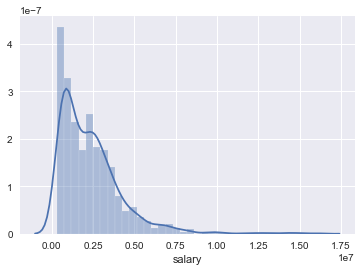

In [42]:
sns.distplot(df_people['salary'])

# not normally distributed, try a log

#
not normally distributed, let us try a log

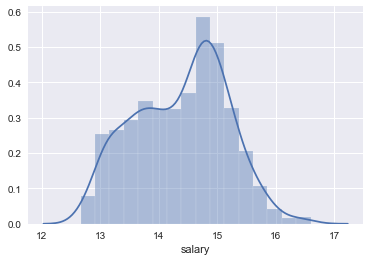

In [43]:
sns.distplot(np.log(df_people['salary']))


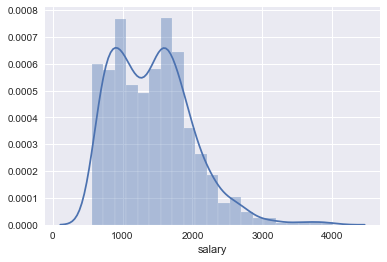

In [44]:
sns.distplot(np.sqrt(df_people['salary']))


# 
Slightly better

## Now we can look at the different categorical options the players can have


Throwing and batting can be advantageous in certain matchups. Let's see if that holds for salary, origin, and physical stature

In [45]:
df_people.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,nameFirst,nameLast,weight,height,bats,throws,debut,finalGame,award_winner,G,AB,R,H,DBL,TPL,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,TB,SLG,OPS,salary,seasons,prim_pos,G_p,W_p,L_p,GS_p,CG,SHO_p,SV_p,IPouts,ER_p,HR_p,SO_p,IBB_p,BAOpp,ERA,WP,HBP_p,BK,BFP,GF,R_p,SH_p,SF_p,GIDP_p,WHIP,IP,BB_p
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,David,Aardsma,215.0,75.0,R,R,2004-04-06,2015-08-23,0.0,27.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,419000.0,7.0,P,27.000000,2.000000,0.333333,0.0,0.0,0.0,0.0,96.000000,18.333333,4.666667,30.000000,1.000000,0.310333,5.742511,1.000000,1.333333,0.000000,145.666667,7.000000,19.000000,1.000000,1.666667,1.333333,1.948782,32.000000,18.333333
2,abadfe01,1985.0,12.0,17.0,D.R.,La Romana,La Romana,Fernando,Abad,235.0,74.0,L,L,2010-07-28,2019-09-28,0.0,29.333333,2.666667,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.047619,0.047619,0.333333,0.047619,0.095238,1087500.0,5.0,P,29.333333,0.333333,3.666667,2.0,0.0,0.0,0.0,84.666667,16.000000,4.666667,21.666667,0.333333,0.279000,5.083699,1.333333,1.333333,0.000000,127.666667,5.000000,17.000000,1.000000,1.333333,1.333333,1.511177,28.222222,11.000000
8,abreuto01,1984.0,11.0,13.0,D.R.,Puerto Plata,Puerto Plata,Tony,Abreu,200.0,70.0,B,R,2007-05-22,2014-07-28,0.0,48.666667,122.333333,11.666667,30.666667,8.333333,0.666667,1.000000,10.333333,0.666667,0.666667,4.666667,23.333333,0.333333,1.000000,0.000000,2.000000,4.333333,0.335772,0.251415,53.333333,0.379815,0.715586,745000.0,4.0,2B,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,accarje01,1981.0,12.0,18.0,USA,AZ,Phoenix,Jeremy,Accardo,195.0,72.0,R,R,2005-05-04,2012-09-27,0.0,52.333333,2.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.333333,0.166667,0.333333,1080000.0,5.0,P,52.333333,2.333333,4.333333,0.0,0.0,0.0,11.0,166.000000,23.333333,4.333333,42.333333,2.666667,0.336667,5.652214,1.666667,1.333333,0.666667,232.000000,27.333333,24.666667,0.666667,2.000000,3.000000,1.716016,55.333333,17.666667
14,ackledu01,1988.0,2.0,26.0,USA,NC,Winston-Salem,Dustin,Ackley,205.0,73.0,L,R,2011-06-17,2016-05-29,0.0,118.666667,441.333333,54.333333,108.333333,18.666667,3.666667,7.333333,39.000000,7.000000,2.000000,45.333333,91.666667,3.000000,0.333333,1.666667,1.666667,4.000000,0.320469,0.250526,186.000000,0.431767,0.752236,2600000.0,5.0,1B,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [46]:
df_people.shape

(994, 67)

In [47]:
df1 = df_people[['playerID','throws']].copy()

In [48]:
df_people['prim_pos'].value_counts()

P     495
OF    166
2B    102
C      77
1B     73
3B     45
SS     36
Name: prim_pos, dtype: int64

In [49]:
df_people = pd.get_dummies(df_people, columns=['throws'], drop_first = True)
df_people = pd.get_dummies(df_people, columns=['bats'], drop_first = True)
df_people = pd.get_dummies(df_people, columns=['prim_pos'], drop_first = True)
df_people = pd.get_dummies(df_people, columns=['birthCountry'], drop_first = True)


df_people.drop(axis=1, columns=['birthMonth','birthState','birthCity','birthDay'],
                           inplace=True, errors='raise')

In [50]:
print(df_people.shape)
df_people.head()

(994, 85)


,playerID,birthYear,nameFirst,nameLast,weight,height,debut,finalGame,award_winner,G,AB,R,H,DBL,TPL,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,TB,SLG,OPS,salary,seasons,G_p,W_p,L_p,GS_p,CG,SHO_p,SV_p,IPouts,ER_p,HR_p,SO_p,IBB_p,BAOpp,ERA,WP,HBP_p,BK,BFP,GF,R_p,SH_p,SF_p,GIDP_p,WHIP,IP,BB_p,throws_R,bats_L,bats_R,prim_pos_2B,prim_pos_3B,prim_pos_C,prim_pos_OF,prim_pos_P,prim_pos_SS,birthCountry_CAN,birthCountry_Colombia,birthCountry_Cuba,birthCountry_Curacao,birthCountry_D.R.,birthCountry_Germany,birthCountry_Jamaica,birthCountry_Japan,birthCountry_Mexico,birthCountry_Netherlands,birthCountry_Nicaragua,birthCountry_P.R.,birthCountry_Panama,birthCountry_South Korea,birthCountry_Taiwan,birthCountry_USA,birthCountry_Venezuela
0,aardsda01,1981.0,David,Aardsma,215.0,75.0,2004-04-06,2015-08-23,0.0,27.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,419000.0,7.0,27.000000,2.000000,0.333333,0.0,0.0,0.0,0.0,96.000000,18.333333,4.666667,30.000000,1.000000,0.310333,5.742511,1.000000,1.333333,0.000000,145.666667,7.000000,19.000000,1.000000,1.666667,1.333333,1.948782,32.000000,18.333333,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,abadfe01,1985.0,Fernando,Abad,235.0,74.0,2010-07-28,2019-09-28,0.0,29.333333,2.666667,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.047619,0.047619,0.333333,0.047619,0.095238,1087500.0,5.0,29.333333,0.333333,3.666667,2.0,0.0,0.0,0.0,84.666667,16.000000,4.666667,21.666667,0.333333,0.279000,5.083699,1.333333,1.333333,0.000000,127.666667,5.000000,17.000000,1.000000,1.333333,1.333333,1.511177,28.222222,11.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,abreuto01,1984.0,Tony,Abreu,200.0,70.0,2007-05-22,2014-07-28,0.0,48.666667,122.333333,11.666667,30.666667,8.333333,0.666667,1.000000,10.333333,0.666667,0.666667,4.666667,23.333333,0.333333,1.000000,0.000000,2.000000,4.333333,0.335772,0.251415,53.333333,0.379815,0.715586,745000.0,4.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10,accarje01,1981.0,Jeremy,Accardo,195.0,72.0,2005-05-04,2012-09-27,0.0,52.333333,2.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.333333,0.166667,0.333333,1080000.0,5.0,52.333333,2.333333,4.333333,0.0,0.0,0.0,11.0,166.000000,23.333333,4.333333,42.333333,2.666667,0.336667,5.652214,1.666667,1.333333,0.666667,232.000000,27.333333,24.666667,0.666667,2.000000,3.000000,1.716016,55.333333,17.666667,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
14,ackledu01,1988.0,Dustin,Ackley,205.0,73.0,2011-06-17,2016-05-29,0.0,118.666667,441.333333,54.333333,108.333333,18.666667,3.666667,7.333333,39.000000,7.000000,2.000000,45.333333,91.666667,3.000000,0.333333,1.666667,1.666667,4.000000,0.320469,0.250526,186.000000,0.431767,0.752236,2600000.0,5.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [51]:
df_field_grouped.head()

,playerID,prim_pos
0,aardsda01,P
1,abadan01,1B
2,abadfe01,P
3,abbotje01,OF
4,abbotku01,2B


In [52]:
df_people = pd.merge(df_people, df1, on='playerID',how = 'left')
df_people = pd.merge(df_people,df_field_grouped, on = 'playerID', how = 'left')
print(df_people.shape)


(994, 87)


In [53]:
df_people['award_winner'] = np.where(df_people['award_winner'] > 0,1,0)

In [54]:
print(df_people.shape)
df_people.head()

(994, 87)


,playerID,birthYear,nameFirst,nameLast,weight,height,debut,finalGame,award_winner,G,AB,R,H,DBL,TPL,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,TB,SLG,OPS,salary,seasons,G_p,W_p,L_p,GS_p,CG,SHO_p,SV_p,IPouts,ER_p,HR_p,SO_p,IBB_p,BAOpp,ERA,WP,HBP_p,BK,BFP,GF,R_p,SH_p,SF_p,GIDP_p,WHIP,IP,BB_p,throws_R,bats_L,bats_R,prim_pos_2B,prim_pos_3B,prim_pos_C,prim_pos_OF,prim_pos_P,prim_pos_SS,birthCountry_CAN,birthCountry_Colombia,birthCountry_Cuba,birthCountry_Curacao,birthCountry_D.R.,birthCountry_Germany,birthCountry_Jamaica,birthCountry_Japan,birthCountry_Mexico,birthCountry_Netherlands,birthCountry_Nicaragua,birthCountry_P.R.,birthCountry_Panama,birthCountry_South Korea,birthCountry_Taiwan,birthCountry_USA,birthCountry_Venezuela,throws,prim_pos
0,aardsda01,1981.0,David,Aardsma,215.0,75.0,2004-04-06,2015-08-23,0,27.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,419000.0,7.0,27.000000,2.000000,0.333333,0.0,0.0,0.0,0.0,96.000000,18.333333,4.666667,30.000000,1.000000,0.310333,5.742511,1.000000,1.333333,0.000000,145.666667,7.000000,19.000000,1.000000,1.666667,1.333333,1.948782,32.000000,18.333333,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,R,P
1,abadfe01,1985.0,Fernando,Abad,235.0,74.0,2010-07-28,2019-09-28,0,29.333333,2.666667,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.047619,0.047619,0.333333,0.047619,0.095238,1087500.0,5.0,29.333333,0.333333,3.666667,2.0,0.0,0.0,0.0,84.666667,16.000000,4.666667,21.666667,0.333333,0.279000,5.083699,1.333333,1.333333,0.000000,127.666667,5.000000,17.000000,1.000000,1.333333,1.333333,1.511177,28.222222,11.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,L,P
2,abreuto01,1984.0,Tony,Abreu,200.0,70.0,2007-05-22,2014-07-28,0,48.666667,122.333333,11.666667,30.666667,8.333333,0.666667,1.000000,10.333333,0.666667,0.666667,4.666667,23.333333,0.333333,1.000000,0.000000,2.000000,4.333333,0.335772,0.251415,53.333333,0.379815,0.715586,745000.0,4.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,R,2B
3,accarje01,1981.0,Jeremy,Accardo,195.0,72.0,2005-05-04,2012-09-27,0,52.333333,2.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.333333,0.166667,0.333333,1080000.0,5.0,52.333333,2.333333,4.333333,0.0,0.0,0.0,11.0,166.000000,23.333333,4.333333,42.333333,2.666667,0.336667,5.652214,1.666667,1.333333,0.666667,232.000000,27.333333,24.666667,0.666667,2.000000,3.000000,1.716016,55.333333,17.666667,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,R,P
4,ackledu01,1988.0,Dustin,Ackley,205.0,73.0,2011-06-17,2016-05-29,0,118.666667,441.333333,54.333333,108.333333,18.666667,3.666667,7.333333,39.000000,7.000000,2.000000,45.333333,91.666667,3.000000,0.333333,1.666667,1.666667,4.000000,0.320469,0.250526,186.000000,0.431767,0.752236,2600000.0,5.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,R,1B


## Creating a CSV to work with going forward.

After all of the cleaning and merging, the csv created by the code below will be more smaller and more efficient to work with. 

After this step, we will be ready for analysis.

In [55]:
df_people.to_csv('rookie.csv')